In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
X = pd.read_csv('X_6400.csv', index_col = 0)
y = pd.read_csv('Y_6400.csv', index_col = 0)
y.describe()

,l2_norm,queries
count,6400.000000,6400.000000
mean,5.115142,10504.922500
std,3.359293,7885.573211
min,0.000000,1.000000
25%,2.590365,3660.000000
50%,5.379589,8629.000000
75%,7.547845,17461.750000
max,14.253477,24000.000000


In [14]:
X.describe()

,Color_Statistic_1,Color_Statistic_2,Color_Statistic_3,Color_Statistic_4,Color_Statistic_5,Color_Statistic_6,Color_Statistic_7,Color_Statistic_8,Color_Statistic_9,Color_Statistic_10,...,PCA_transform_6,PCA_transform_7,PCA_transform_8,PCA_transform_9,PCA_transform_10,PCA_transform_11,PCA_transform_12,PCA_transform_13,PCA_transform_14,PCA_transform_15
count,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,...,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000
mean,101.421492,115.066817,118.980113,3557.056058,3456.517086,3575.053361,0.405278,0.130993,0.089632,21.927539,...,0.026137,0.020690,0.016943,0.014184,0.012142,2.367031,5.472031,9.421719,18.962344,29.999688
std,40.546280,35.066457,36.976210,2019.467126,1797.486547,1873.717602,1.161152,0.939665,0.987496,24.326623,...,0.010473,0.008563,0.007259,0.006294,0.005599,1.976453,5.187544,8.483686,13.336040,14.766516
min,1.560467,5.260344,0.773238,2.793365,34.145264,4.035002,-8.535276,-6.021841,-5.920074,0.000000,...,0.000992,0.000592,0.000559,0.000451,0.000310,1.000000,1.000000,1.000000,1.000000,1.000000
25%,72.990583,93.349624,96.409962,2086.274203,2146.464944,2186.250905,-0.154227,-0.332846,-0.388125,5.000000,...,0.018510,0.014427,0.011598,0.009535,0.007993,1.000000,2.000000,4.000000,9.000000,17.000000
50%,99.547423,115.680873,118.625448,3236.501668,3207.356204,3328.882889,0.385201,0.137523,0.091686,15.000000,...,0.025889,0.020287,0.016506,0.013711,0.011526,2.000000,4.000000,7.000000,15.000000,28.000000
75%,126.044424,135.505276,140.898069,4679.392438,4454.210737,4671.729898,0.941912,0.617815,0.579650,30.000000,...,0.033093,0.026489,0.021932,0.018409,0.015816,3.000000,6.000000,12.000000,26.000000,46.000000
max,241.193280,240.351602,247.298250,12913.718941,12310.524498,12310.524498,22.761162,9.422033,16.723153,207.000000,...,0.070385,0.060977,0.054966,0.043527,0.036608,35.000000,50.000000,50.000000,50.000000,50.000000


In [15]:
X = X.dropna(axis = 1)
non_constant_cols = X.columns[X.std() != 0]
X = X[non_constant_cols]

In [16]:
y['hard'] = y['l2_norm'] >= 6.5
# y['hard'] = y['l2_norm'] == 0
y['hard'][y['l2_norm'] == 0] = True

/tmp/ipykernel_214649/201278600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['hard'][y['l2_norm'] == 0] = True


In [17]:
sum(y['hard'])/len(y['hard'])

0.5340625

In [18]:
X.columns[-16:]

Index(['SVD_20', 'PCA_transform_1', 'PCA_transform_2', 'PCA_transform_3',
       'PCA_transform_4', 'PCA_transform_5', 'PCA_transform_6',
       'PCA_transform_7', 'PCA_transform_8', 'PCA_transform_9',
       'PCA_transform_10', 'PCA_transform_11', 'PCA_transform_12',
       'PCA_transform_13', 'PCA_transform_14', 'PCA_transform_15'],
      dtype='object')

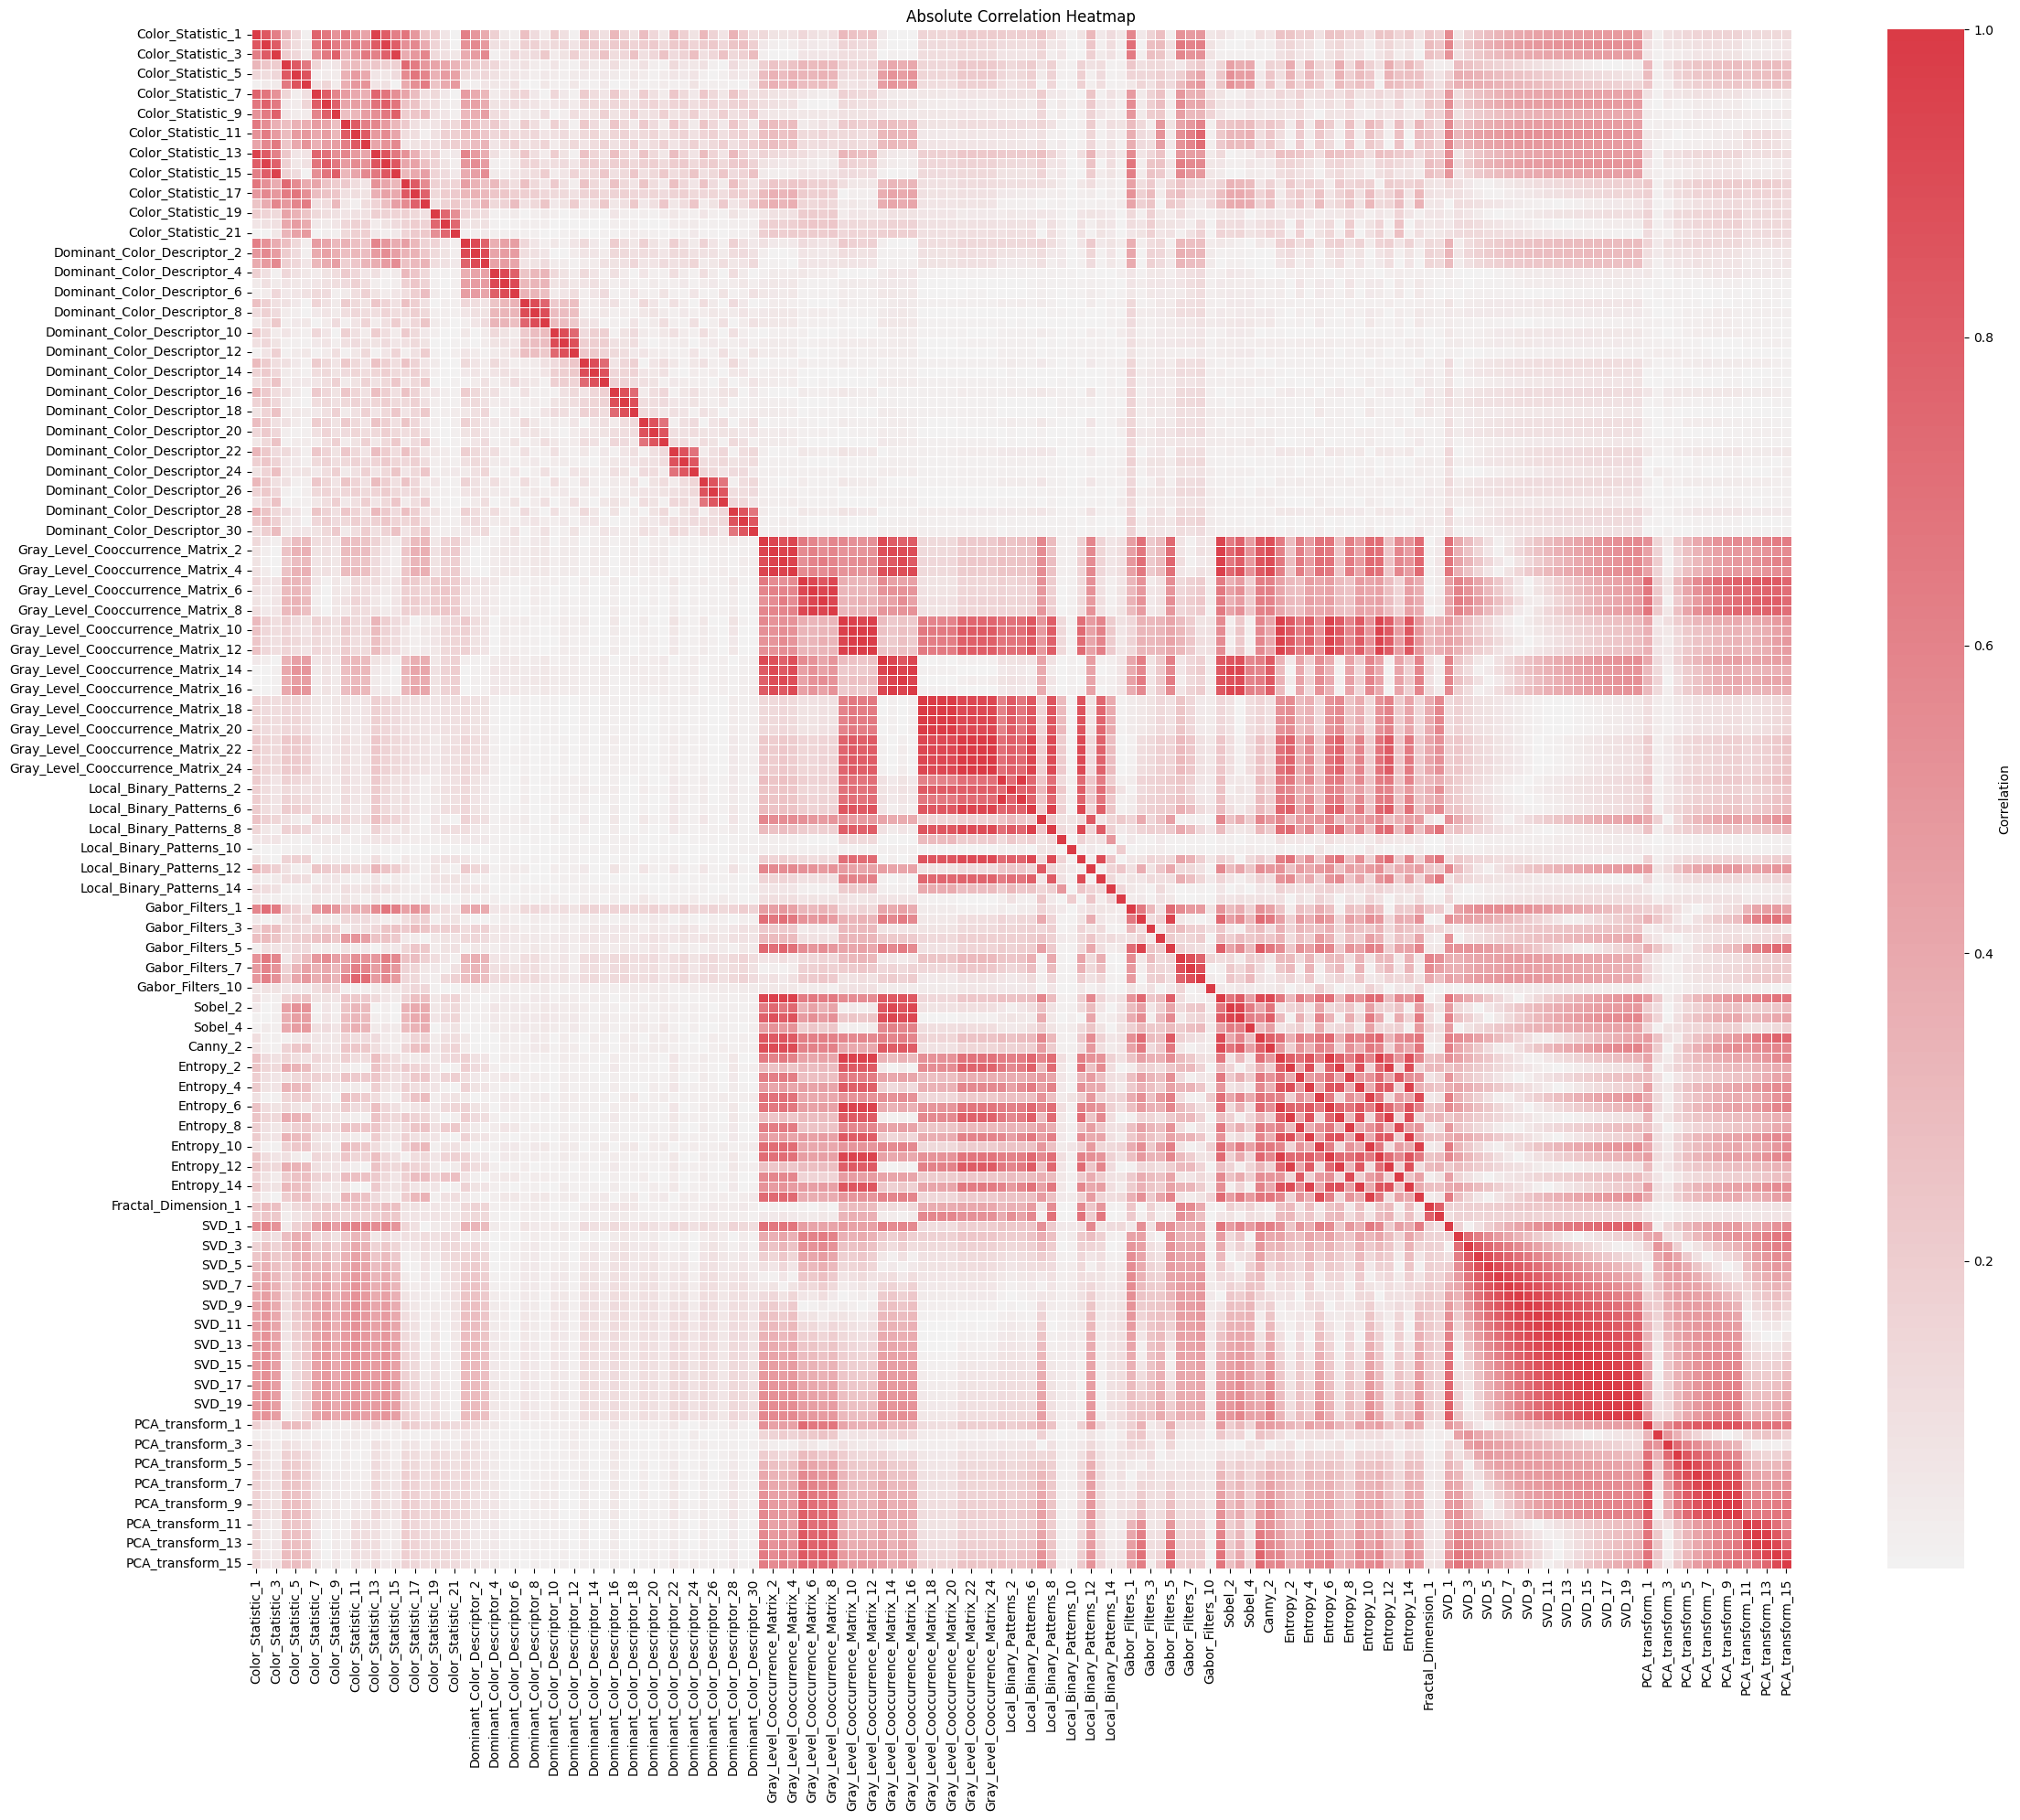

In [10]:
plt.figure(figsize=(24, 20))

# Create a customized color palette
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Generate the heatmap with annotations, using the customized color palette
heatmap = sns.heatmap(abs(X[X.columns].corr()), annot=False, linewidths=.5, fmt='.2f', cmap=cmap, center=0)

# Set the title
plt.title('Absolute Correlation Heatmap')

# Add a color bar for reference
colorbar = heatmap.collections[0].colorbar
colorbar.set_label('Correlation')

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
# plt.savefig('./output_imgs/Absolute_Correlation_Heatmap_681.jpg', dpi=300, bbox_inches='tight')
plt.show()

# Reg

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.ensemble import RandomForestRegressor

In [59]:
print(X.columns[80: 100])

Index(['Local_Binary_Patterns_8', 'Local_Binary_Patterns_9',
       'Local_Binary_Patterns_10', 'Local_Binary_Patterns_11',
       'Local_Binary_Patterns_12', 'Local_Binary_Patterns_13',
       'Local_Binary_Patterns_14', 'Local_Binary_Patterns_15',
       'Gabor_Filters_1', 'Gabor_Filters_2', 'Gabor_Filters_3',
       'Gabor_Filters_4', 'Gabor_Filters_5', 'Gabor_Filters_6',
       'Gabor_Filters_7', 'Gabor_Filters_9', 'Gabor_Filters_10', 'Sobel_1',
       'Sobel_2', 'Sobel_3'],
      dtype='object')


In [9]:
PCA_list = ['PCA_transform_1', 'PCA_transform_2', 'PCA_transform_3',
       'PCA_transform_4', 'PCA_transform_5', 'PCA_transform_6',
       'PCA_transform_7', 'PCA_transform_8', 'PCA_transform_9',
       'PCA_transform_10', 'PCA_transform_11', 'PCA_transform_12',
       'PCA_transform_13', 'PCA_transform_14', 'PCA_transform_15']
Gabor_list = ['Gabor_Filters_1', 'Gabor_Filters_2', 'Gabor_Filters_3',
       'Gabor_Filters_4', 'Gabor_Filters_5', 'Gabor_Filters_6',
       'Gabor_Filters_7', 'Gabor_Filters_9', 'Gabor_Filters_10']
PG_list = ['PCA_transform_1', 'PCA_transform_2', 'PCA_transform_3',
       'PCA_transform_4', 'PCA_transform_5', 'PCA_transform_6',
       'PCA_transform_7', 'PCA_transform_8', 'PCA_transform_9',
       'PCA_transform_10', 'PCA_transform_11', 'PCA_transform_12',
       'PCA_transform_13', 'PCA_transform_14', 'PCA_transform_15', 
       'Gabor_Filters_1', 'Gabor_Filters_2', 'Gabor_Filters_3',
       'Gabor_Filters_4', 'Gabor_Filters_5', 'Gabor_Filters_6',
       'Gabor_Filters_7', 'Gabor_Filters_9', 'Gabor_Filters_10']

In [55]:
# Creating and fitting the Random Forest regression model
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y['l2_norm'], test_size=0.2, random_state=42)

# Standardizing the features
X_train_ = X_train
X_train = (X_train - X_train_.mean())/X_train_.std()
X_test = (X_test - X_train_.mean())/X_train_.std()

random_forest = RandomForestRegressor(max_depth=10, n_estimators=100, random_state=42)
random_forest.fit(X_train[PCA_list], y_train)


# Making predictions
predictions_train = random_forest.predict(X_train[PCA_list])
predictions_test = random_forest.predict(X_test[PCA_list])

# Calculating mean squared error
mse = mean_squared_error(y_train, predictions_train)
mae = mean_absolute_error(y_train, predictions_train)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Calculating mean squared error
mse = mean_squared_error(y_test, predictions_test)
mae = mean_absolute_error(y_test, predictions_test)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 7.413552658367519
Mean Absolute Error: 2.2556697527709617
Mean Squared Error: 11.23076090333438
Mean Absolute Error: 2.769650384589771


In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Creating and fitting the Random Forest regression model
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y['l2_norm'], test_size=0.2, random_state=42)

# Standardizing the features
X_train_ = X_train
X_train = (X_train - X_train_.mean())/X_train_.std()
X_test = (X_test - X_train_.mean())/X_train_.std()

# random_forest = RandomForestRegressor(max_depth=10, n_estimators=100, random_state=42)
# random_forest.fit(X_train[Gabor_list], y_train)

from sklearn.neural_network import MLPRegressor
# mlp_regressor = MLPRegressor(hidden_layer_sizes=(128, 128), activation='relu', solver='adam', random_state=42, max_iter=100)
# mlp_regressor.fit(X_train[PCA_list], y_train)

# Initializing and fitting the MLPRegressor
# mlp = MLPRegressor(hidden_layer_sizes=(50, 30), max_iter=1000, random_state=42)
mlp_regressor = MLPRegressor(hidden_layer_sizes=(200, 200), activation='relu', solver='adam', random_state=42, max_iter=1000)

train_errors, test_errors = [], []

for i in range(1, 200):  # Train the model for 100 iterations
    mlp_regressor.partial_fit(X_train[PCA_list], y_train)  # Partial fit to update the model gradually
    y_train_pred = mlp_regressor.predict(X_train[PCA_list])
    y_test_pred = mlp_regressor.predict(X_test[PCA_list])
    
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

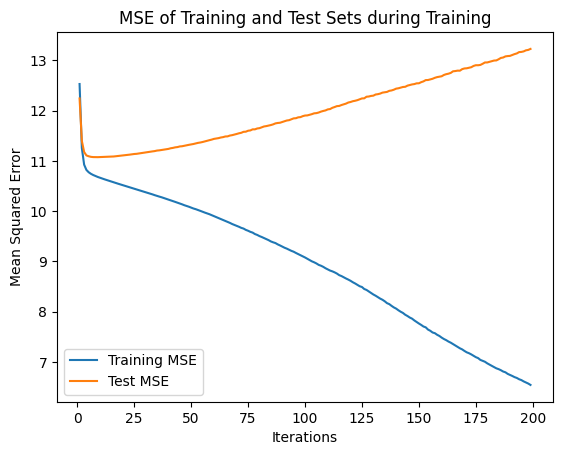

Mean Squared Error: 6.545577190604192
Mean Absolute Error: 2.0713493930138425
Mean Squared Error: 13.225277688146111
Mean Absolute Error: 2.999349021509998


In [13]:

# Plotting the MSE of training and test sets during training
plt.plot(range(1, 200), train_errors, label='Training MSE')
plt.plot(range(1, 200), test_errors, label='Test MSE')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('MSE of Training and Test Sets during Training')
plt.legend()
plt.show()


# Making predictions
# predictions_train = random_forest.predict(X_train[Gabor_list])
# predictions_test = random_forest.predict(X_test[Gabor_list])

predictions_train = mlp_regressor.predict(X_train[PCA_list])
predictions_test = mlp_regressor.predict(X_test[PCA_list])

# Calculating mean squared error
mse = mean_squared_error(y_train, predictions_train)
mae = mean_absolute_error(y_train, predictions_train)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Calculating mean squared error
mse = mean_squared_error(y_test, predictions_test)
mae = mean_absolute_error(y_test, predictions_test)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

In [76]:
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_train, predictions_train)
print(evs)

0.14518300681051421


In [19]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Assuming X contains your features and y contains your labels

# Instantiate the RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Resample the dataset
X_resampled, y_l2_resampled = oversampler.fit_resample(X, y['hard'])
X_ = X_resampled.fillna(X_resampled.mean())
X_resamp_norm = (X_ - X_.min()) / (X_.max() - X_.min() + 1e-5)
X_ = X_resampled.fillna(X_resampled.mean())
X_resamp_norm = (X_ - X_.min()) / (X_.max() - X_.min() + 1e-5)
dataset_resampled_l2 = pd.concat([X_resamp_norm, y_l2_resampled], axis = 1)
# X_resampled, y_q_resampled = oversampler.fit_resample(X, y['query_class'])
# Now X_resampled and y_resampled contain the balanced dataset

In [20]:
X_resamp_norm.isnull().values.any()

False

# Drop the features with high VIF
X_no_high_vif = X_resamp_norm.drop(columns=high_vif_features['Feature'])
X_no_high_vif.columns

In [13]:
# Calculate the correlations
correlations_l2 = dataset_resampled_l2.corr()

# Select the correlation of features with the target variable
correlation_with_y_l2 = correlations_l2['hard'][:-1]  # Exclude the correlation with itself (assuming 'y' is the target column)

# Print or access correlations as needed
# print(correlation_with_y)
correlation_with_y_l2 = pd.DataFrame(correlation_with_y_l2)
correlation_with_y_l2.describe()

,hard
count,155.000000
mean,0.026958
std,0.067988
min,-0.151562
25%,-0.009492
50%,0.014138
75%,0.069915
max,0.171201


In [14]:
l2_top_cor_features = list(correlation_with_y_l2[abs(correlation_with_y_l2['hard'])>0.05].index)
print(len(l2_top_cor_features))
print(l2_top_cor_features)

60
['Color_Statistic_4', 'Color_Statistic_5', 'Color_Statistic_6', 'Color_Statistic_7', 'Color_Statistic_9', 'Color_Statistic_10', 'Color_Statistic_11', 'Color_Statistic_12', 'Color_Statistic_16', 'Color_Statistic_17', 'Color_Statistic_18', 'Gray_Level_Cooccurrence_Matrix_1', 'Gray_Level_Cooccurrence_Matrix_2', 'Gray_Level_Cooccurrence_Matrix_3', 'Gray_Level_Cooccurrence_Matrix_4', 'Gray_Level_Cooccurrence_Matrix_5', 'Gray_Level_Cooccurrence_Matrix_6', 'Gray_Level_Cooccurrence_Matrix_7', 'Gray_Level_Cooccurrence_Matrix_8', 'Gray_Level_Cooccurrence_Matrix_13', 'Gray_Level_Cooccurrence_Matrix_14', 'Gray_Level_Cooccurrence_Matrix_15', 'Gray_Level_Cooccurrence_Matrix_16', 'Local_Binary_Patterns_7', 'Local_Binary_Patterns_12', 'Gabor_Filters_1', 'Gabor_Filters_2', 'Gabor_Filters_4', 'Gabor_Filters_5', 'Sobel_1', 'Sobel_2', 'Sobel_3', 'Sobel_4', 'Canny_1', 'Canny_2', 'Entropy_1', 'Entropy_3', 'Entropy_5', 'Entropy_6', 'Entropy_8', 'Entropy_10', 'Entropy_11', 'Entropy_13', 'Entropy_15', 'SVD_

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

In [16]:
# Assuming X is your dataframe of features
vif_scores_l2 = calculate_vif(X_resamp_norm[l2_top_cor_features])
print(vif_scores_l2)
# Identify features with high VIF
high_vif_features = vif_scores_l2[vif_scores_l2['VIF'] > 200] 
print(len(high_vif_features))

                              Feature            VIF
0                   Color_Statistic_4      59.722426
1                   Color_Statistic_5     120.952895
2                   Color_Statistic_6      63.930605
3                   Color_Statistic_7     165.132062
4                   Color_Statistic_9     103.481443
5                  Color_Statistic_10      14.125820
6                  Color_Statistic_11      35.739379
7                  Color_Statistic_12      19.768083
8                  Color_Statistic_16     255.584413
9                  Color_Statistic_17     567.631965
10                 Color_Statistic_18     336.693933
11   Gray_Level_Cooccurrence_Matrix_1    1304.139710
12   Gray_Level_Cooccurrence_Matrix_2    3164.524933
13   Gray_Level_Cooccurrence_Matrix_3    1512.052674
14   Gray_Level_Cooccurrence_Matrix_4    3321.227833
15   Gray_Level_Cooccurrence_Matrix_5    1298.602361
16   Gray_Level_Cooccurrence_Matrix_6    2741.921233
17   Gray_Level_Cooccurrence_Matrix_7    1475.

In [17]:
# Drop the features with high VIF
X_no_high_vif = X_resamp_norm[l2_top_cor_features].drop(columns=high_vif_features['Feature'])
X_no_high_vif.columns

Index(['Color_Statistic_4', 'Color_Statistic_5', 'Color_Statistic_6',
       'Color_Statistic_7', 'Color_Statistic_9', 'Color_Statistic_10',
       'Color_Statistic_11', 'Color_Statistic_12', 'Local_Binary_Patterns_7',
       'Local_Binary_Patterns_12', 'Gabor_Filters_1', 'Gabor_Filters_2',
       'Gabor_Filters_4', 'Gabor_Filters_5', 'Sobel_2', 'Sobel_4', 'Canny_1',
       'Canny_2', 'SVD_1', 'SVD_2', 'PCA_transform_10', 'PCA_transform_11',
       'PCA_transform_12', 'PCA_transform_14', 'PCA_transform_15'],
      dtype='object')

data_q = pd.melt(dataset_resampled_q[q_top_cor_features], id_vars="query_class",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20, 10))
sns.swarmplot(x="features", y="value", hue="query_class", data=data_q)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Image Feature Distributions of Different Adversarial Classes')

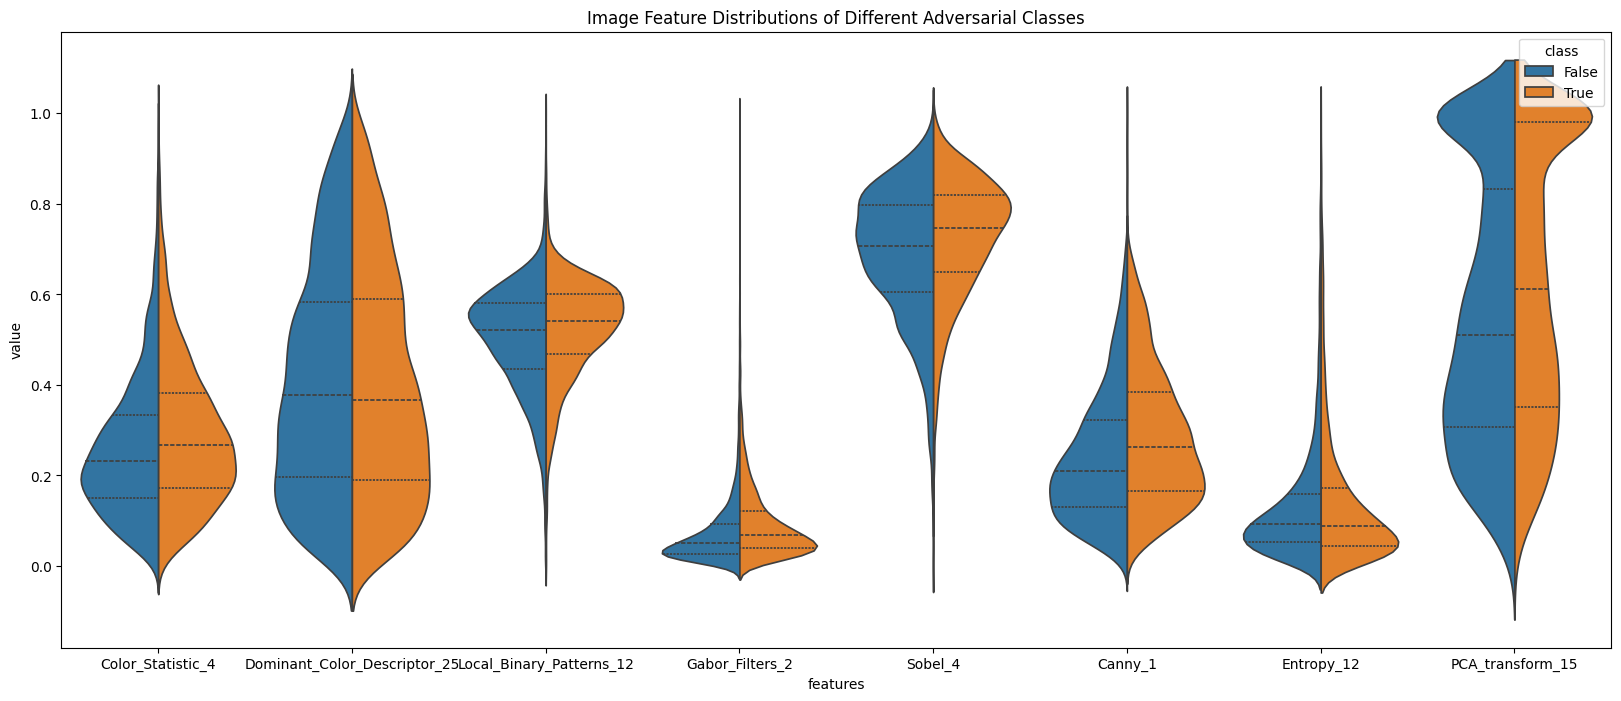

In [20]:
data_l2 = pd.melt(dataset_resampled_l2[draw_col], id_vars="hard",
                    var_name="features",
                    value_name='value')
data_l2 = data_l2.rename(columns={'hard': 'class'})
plt.figure(figsize=(20, 8))
sns.violinplot(x="features", y="value", hue="class", data = data_l2, split=True, inner="quart", density_norm='count')
plt.xticks(rotation=0)
plt.title("Image Feature Distributions of Different Adversarial Classes")
# plt.savefig('./output_imgs/features_distributions_classified_halfhalf_1600.jpg', dpi=300, bbox_inches='tight') # Save as PNG, adjust format as needed

sns.scatterplot(dataset_resampled_l2, x = 'Gray_Level_Cooccurrence_Matrix_17', y = 'Color_Statistic_10', hue='l2_norm_class')

X = pd.read_csv('X.csv', index_col = 0)
y = pd.read_csv('Y.csv', index_col = 0)
y['l2_norm_0'] = (y['l2_norm'] > 5)
X = X[y['l2_norm'] != 0]
y = y[y['l2_norm'] != 0]
X = (X - X.mean()) / (X.std())
# X_l2_n_0 = X[['Gray_Level_Cooccurrence_Matrix_17', 'Gray_Level_Cooccurrence_Matrix_19', 'Gray_Level_Cooccurrence_Matrix_23']][y['l2_norm_0'] == False]
# X_l2_0 = X[['Gray_Level_Cooccurrence_Matrix_17', 'Gray_Level_Cooccurrence_Matrix_19', 'Gray_Level_Cooccurrence_Matrix_23']][y['l2_norm_0'] == True]
X_l2_n_0 = X[X.columns[: 20]][y['l2_norm_0'] == True]
X_l2_0 = X[X.columns[: 20]][y['l2_norm_0'] == False]
y_l2_n_0 = y['l2_norm_0'][y['l2_norm_0'] == True]
y_l2_0 = y['l2_norm_0'][y['l2_norm_0'] == False]
dataset_0 = pd.concat([X_l2_n_0, y_l2_n_0], axis = 1)
dataset_n_0 = pd.concat([X_l2_0, y_l2_0], axis = 1)
dataset = pd.concat([dataset_0, dataset_n_0], ignore_index = True)
data = pd.melt(dataset, id_vars="l2_norm_0",
                    var_name="features",
                    value_name='value')

In [21]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# Create the RFE object and rank each pixel
clf_rf = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf, n_features_to_select=10, step=1)
rfe = rfe.fit(x_train, y_train)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y['hard'], test_size=0.3, random_state=42)

In [23]:
X_resampled, y_l2_resampled = oversampler.fit_resample(x_train, y_train)
#X_resampled = x_train
#y_l2_resampled = y_train
X_ = X_resampled.fillna(X_resampled.mean())
X_resamp_norm = (X_ - X_.min()) / (X_.max() - X_.min() + 1e-6)
x_test = x_test.fillna(x_train.mean())
x_test = (x_test - X_.min()) / (X_.max() - X_.min() + 1e-6)
# x_train, x_test, y_train, y_test = train_test_split(X_resamp_norm, y_l2_resampled, test_size=0.2, random_state=42)

In [25]:
PCA_list = ['PCA_transform_1', 'PCA_transform_2', 'PCA_transform_3',
       'PCA_transform_4', 'PCA_transform_5', 'PCA_transform_6',
       'PCA_transform_7', 'PCA_transform_8', 'PCA_transform_9',
       'PCA_transform_10', 'PCA_transform_11', 'PCA_transform_12',
       'PCA_transform_13', 'PCA_transform_14', 'PCA_transform_15']

Feature ranking:
1. feature 64 (0.038055)
2. feature 89 (0.031600)
3. feature 97 (0.028345)
4. feature 99 (0.020110)
5. feature 66 (0.016619)
6. feature 63 (0.014805)
7. feature 15 (0.013905)
8. feature 21 (0.013552)
9. feature 5 (0.013478)
10. feature 101 (0.013407)
11. feature 120 (0.012945)
12. feature 52 (0.012793)
13. feature 12 (0.012290)
14. feature 92 (0.011782)
15. feature 9 (0.011236)
16. feature 33 (0.011187)
17. feature 117 (0.011182)
18. feature 1 (0.011039)
19. feature 109 (0.010879)
20. feature 65 (0.010338)
21. feature 0 (0.010231)
22. feature 80 (0.010228)
23. feature 25 (0.009963)
24. feature 105 (0.009848)
25. feature 16 (0.009677)
26. feature 39 (0.009153)
27. feature 102 (0.009025)
28. feature 30 (0.008858)
29. feature 3 (0.008749)
30. feature 110 (0.008601)
31. feature 42 (0.008519)
32. feature 2 (0.008502)
33. feature 54 (0.008493)
34. feature 22 (0.008428)
35. feature 31 (0.008328)
36. feature 129 (0.008319)
37. feature 115 (0.008181)
38. feature 18 (0.008109)
3

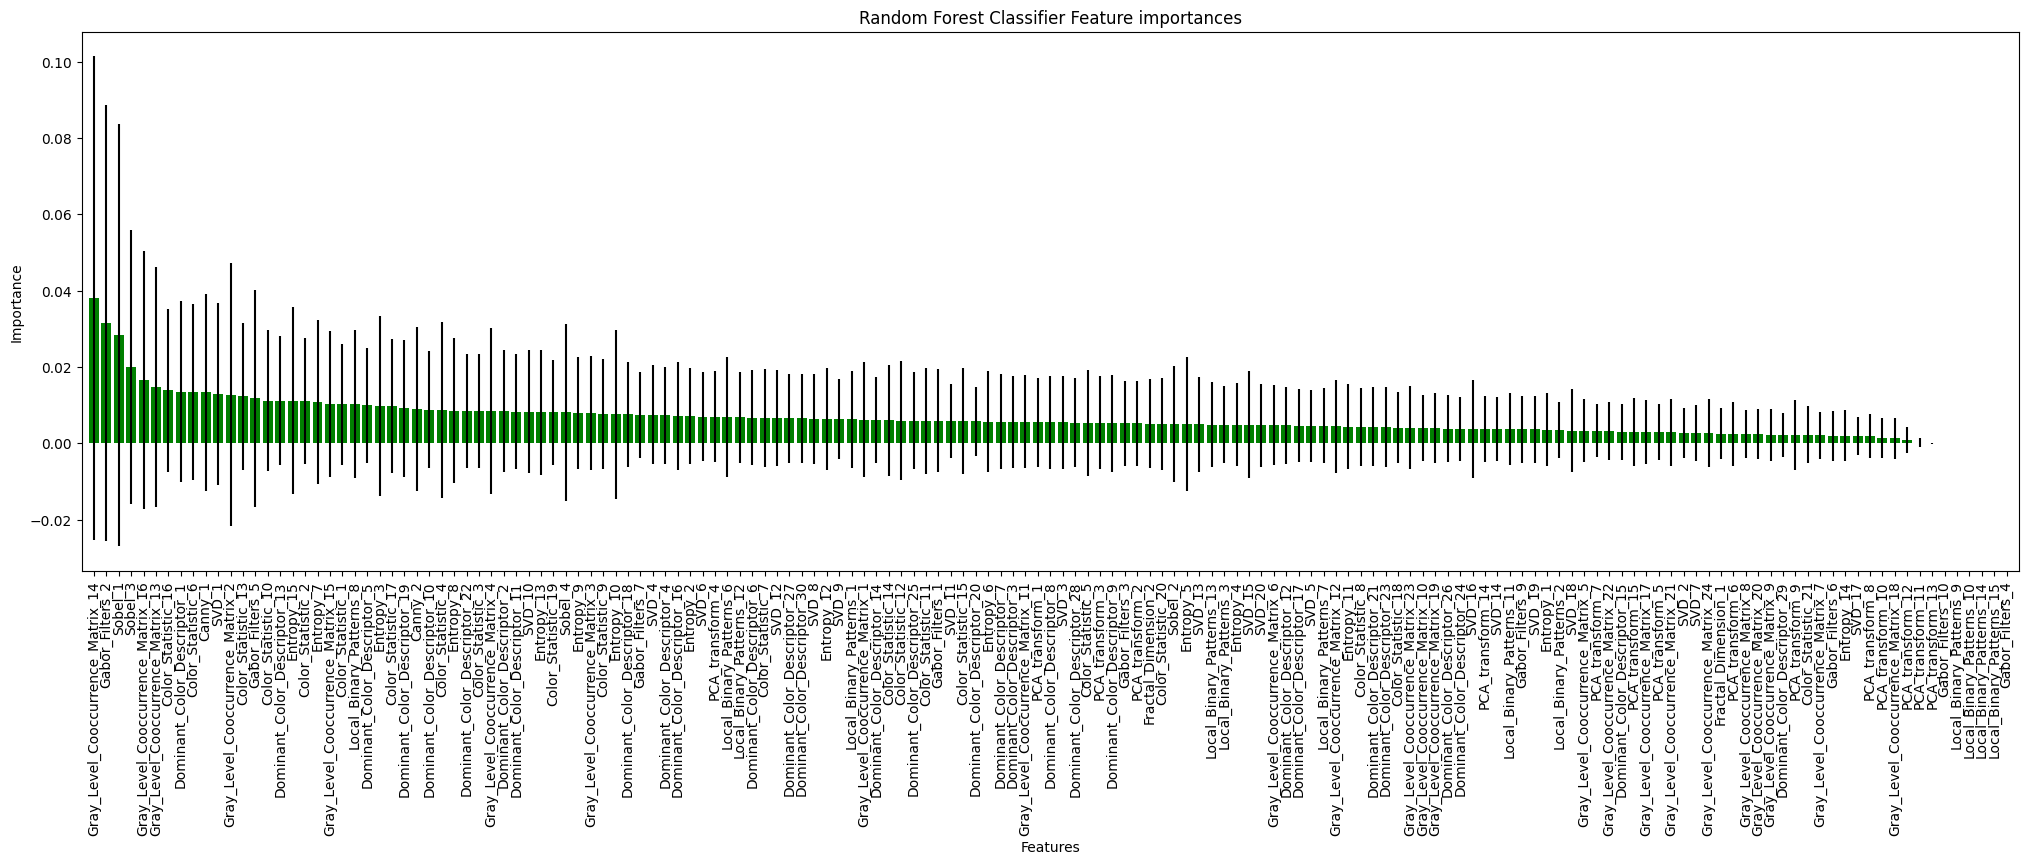

In [40]:
# clf_rf_5 = RandomForestClassifier(
#     bootstrap=True,
#     max_depth=7,
#     max_features=14, 
#     min_samples_leaf=2,
#     min_samples_split=5, 
#     n_estimators=100,
#     random_state=42
# )
clf_rf_5 = RandomForestClassifier(
    bootstrap=True,
    max_depth=6,
    max_features=15, 
    min_samples_leaf=9,
    min_samples_split=3, 
    n_estimators=50,
    random_state=42
)
clr_rf_5 = clf_rf_5.fit(X_resamp_norm, y_l2_resampled)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_resamp_norm.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(25, 7))
plt.title("Random Forest Classifier Feature importances")
plt.bar(range(X_resamp_norm.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_resamp_norm.shape[1]), X_resamp_norm.columns[indices], rotation=90)
plt.xlim([-1, X_resamp_norm.shape[1]])
plt.xlabel('Features')  # Label for x-axis
plt.ylabel('Importance')  # Label for y-axis
plt.savefig('./output_imgs/rf_features_importances_classified_halfhalf_6400_61.jpg', dpi=300, bbox_inches='tight') # Save as PNG, adjust format as needed

plt.show()

Accuracy is:  0.7035490605427975


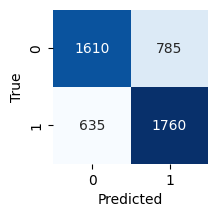

In [45]:
ac_ = accuracy_score(y_l2_resampled, clf_rf_5.predict(X_resamp_norm))
print('Accuracy is: ', ac_)
cm_ = confusion_matrix(y_l2_resampled, clf_rf_5.predict(X_resamp_norm))
plt.figure(figsize=(2, 2))
sns.heatmap(cm_, annot=True, fmt="d", cmap="Blues", cbar = False)

# Set labels, title, and other properties
plt.xlabel('Predicted')
plt.ylabel('True')
# plt.title('Confusion Matrix')

# Save the image
plt.savefig('./output_imgs/confusion_matrix_train_classified_halfhalf_6400.jpg', dpi=300, bbox_inches='tight') # Save as PNG, adjust format as needed

plt.show()

Accuracy is:  0.6135416666666667


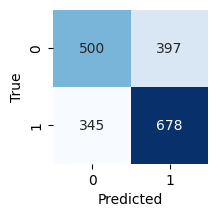

In [47]:

ac_ = accuracy_score(y_test, clf_rf_5.predict(x_test))
print('Accuracy is: ',ac_)
cm_ = confusion_matrix(y_test, clf_rf_5.predict(x_test))
# sns.heatmap(cm_,annot=True,fmt="d")
plt.figure(figsize=(2, 2))
sns.heatmap(cm_, annot=True, fmt="d", cmap="Blues", cbar = False)

# Set labels, title, and other properties
plt.xlabel('Predicted')
plt.ylabel('True')
# plt.title('Confusion Matrix')

# Save the image
plt.savefig('./output_imgs/confusion_matrix_test_classified_halfhalf_6400.jpg', dpi=300, bbox_inches='tight') # Save as PNG, adjust format as needed


plt.show()